In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv("adult_dataset.csv")

In [34]:
data.head()


age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [35]:
#data cleaning for unknown workclass values
data_1=data[data["workclass"]=='?']
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


In [36]:
#removing unknown values from data set
df=data[data['workclass']!="?"]
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [37]:
#check for missing values in categorical values
df_categorical=df.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x=="?",axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [38]:
#check for missing values in int values
df_check=df.select_dtypes(include=['int64'])
df_check.apply(lambda x: x=="?",axis=0).sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [39]:
df=df[df['occupation']!='?']
df=df[df['native.country']!='?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df_cross_check=df.select_dtypes(include=['object'])
df_cross_check.apply(lambda x: x=='?',axis=0).sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [41]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical

workclass  education  marital.status  occupation  relationship  race  \
1              2         11               6           3             1     4   
3              2          5               0           6             4     4   
4              2         15               5           9             3     4   
5              2         11               0           7             4     4   
6              2          0               5           0             4     4   
...          ...        ...             ...         ...           ...   ...   
32556          2         15               4          10             1     4   
32557          2          7               2          12             5     4   
32558          2         11               2           6             0     4   
32559          2         11               6           0             4     4   
32560          2         11               4           0             3     4   

       sex  native.country  income  
1        0              38       0  
3        0              38       0  
4        0              38       0  
5        0              38       0  
6        1              38       0  
...    ...             ...     ...  
32556    1              38       0  
32557    0              38       0  
32558    1              38       1  
32559    0              38       0  
32560    1              38       0  

[30162 rows x 9 columns]

In [46]:
#concating both dataset 
#df=df.drop(df_categorical.columns,axis=1)
df=pd.concat([df,df_categorical],axis=1)
df.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [48]:
#prediction is 'income' so convert it in astype="category"
df['income']=df['income'].astype('category')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int32   
 7   education       30162 non-null  int32   
 8   marital.status  30162 non-null  int32   
 9   occupation      30162 non-null  int32   
 10  relationship    30162 non-null  int32   
 11  race            30162 non-null  int32   
 12  sex             30162 non-null  int32   
 13  native.country  30162 non-null  int32   
 14  income          30162 non-null  category
dtypes: category(1), int32(8), int64(6)
memory usage: 2.6 MB


In [55]:
#model_building
from sklearn.model_selection import train_test_split
x=df.drop('income',axis=1)
y=df['income']
x,y

(       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
 1       82  132870              9             0          4356              18   
 3       54  140359              4             0          3900              40   
 4       41  264663             10             0          3900              40   
 5       34  216864              9             0          3770              45   
 6       38  150601              6             0          3770              40   
 ...    ...     ...            ...           ...           ...             ...   
 32556   22  310152             10             0             0              40   
 32557   27  257302             12             0             0              38   
 32558   40  154374              9             0             0              40   
 32559   58  151910              9             0             0              40   
 32560   22  201490              9             0             0              20   
 
        workcl

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=model.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)
confusion_matrix(y_pred,y_test)


0.8455077909161234


array([[6425, 1055],
       [ 343, 1226]], dtype=int64)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7480
           1       0.54      0.78      0.64      1569

    accuracy                           0.85      9049
   macro avg       0.74      0.82      0.77      9049
weighted avg       0.88      0.85      0.86      9049



In [86]:
import pydotplus,graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO

In [136]:
features=list(df.columns[:[14]])
features

TypeError: slice indices must be integers or None or have an __index__ method

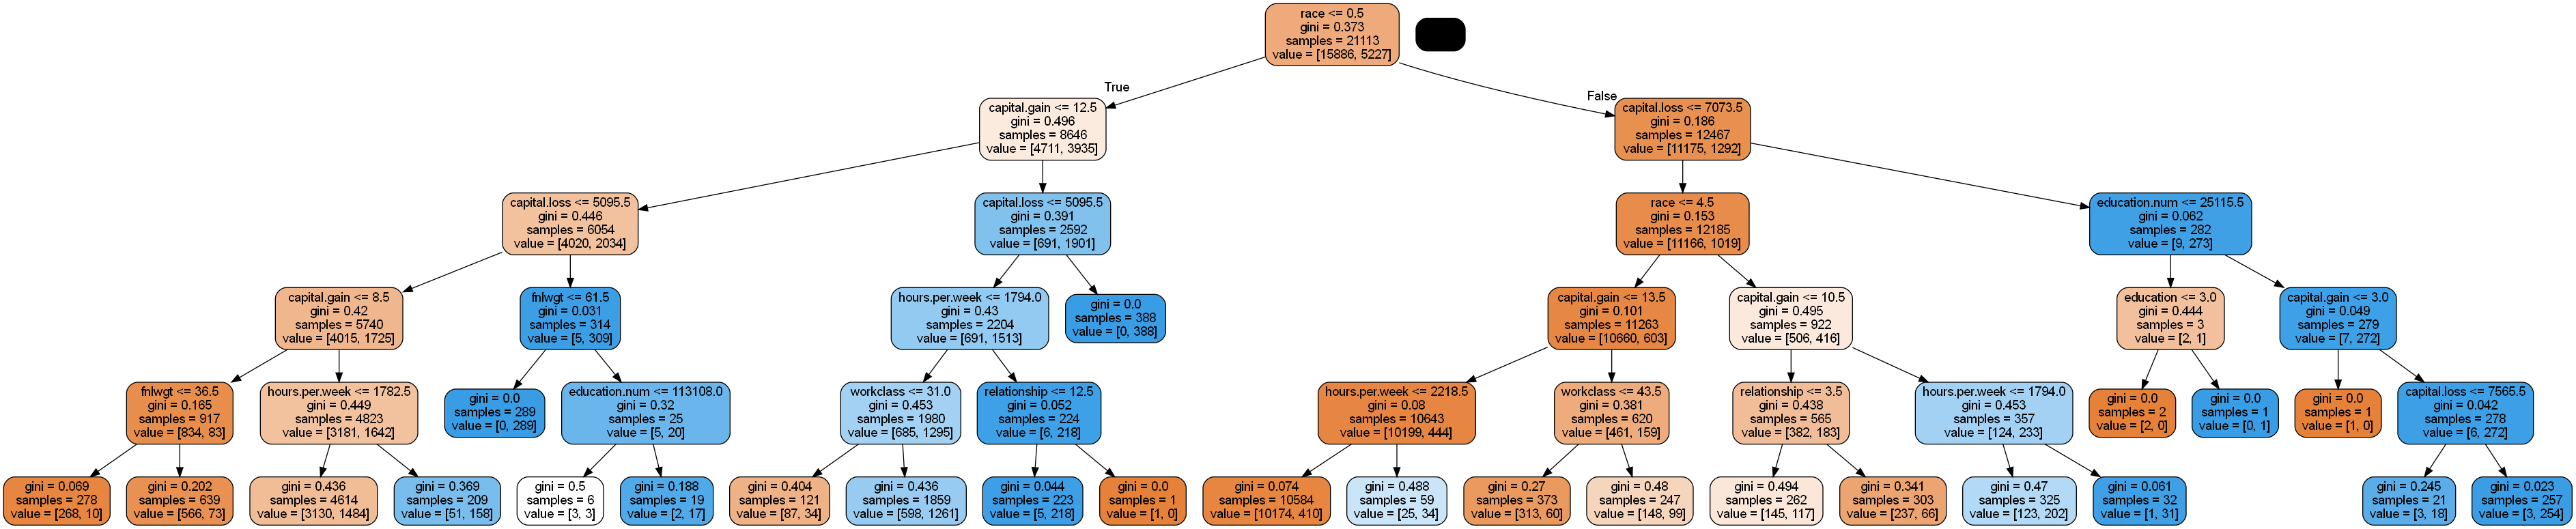

In [137]:
dot_data=StringIO()
export_graphviz(decision_tree=model,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [148]:
#tuning the model with maximum depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
dtree=DecisionTreeClassifier(criterion="gini")
parameter={'max_depth':range(1,40)}
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [149]:
scores=tree.cv_results_
pd.DataFrame(scores).head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009922      0.008552         0.000603        0.000803   
1       0.012582      0.006293         0.003125        0.006250   
2       0.019746      0.006652         0.000643        0.000824   
3       0.024072      0.007375         0.003924        0.005918   
4       0.027368      0.005070         0.000407        0.000814   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.752546           0.752309   
1               2  {'max_depth': 2}           0.827611           0.819086   
2               3  {'max_depth': 3}           0.842292           0.833057   
3               4  {'max_depth': 4}           0.847502           0.836135   
4               5  {'max_depth': 5}           0.853185           0.843239   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.752309           0.752487  ...         0.752427        0.000099   
1           0.827848           0.821649  ...         0.822242        0.004955   
2           0.840635           0.836097  ...         0.836546        0.004402   
3           0.845844           0.844150  ...         0.841993        0.004820   
4           0.848212           0.849597  ...         0.845971        0.006079   

   rank_test_score  split0_train_score  split1_train_score  \
0               39            0.752398            0.752457   
1               16            0.820900            0.823031   
2               11            0.835287            0.837596   
3                9            0.840557            0.843280   
4                6            0.848905            0.851036   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.752457            0.752413            0.752413   
1            0.820841            0.822391            0.824048   
2            0.835524            0.836836            0.838139   
3            0.840853            0.844177            0.846072   
4            0.844168            0.850098            0.846486   

   mean_train_score  std_train_score  
0          0.752427         0.000025  
1          0.822242         0.001239  
2          0.836676         0.001120  
3          0.842988         0.002073  
4          0.848139         0.002503  

[5 rows x 21 columns]

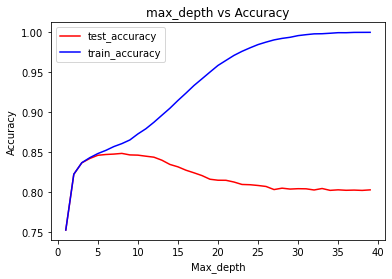

In [150]:
plt.plot(scores["param_max_depth"],scores["mean_test_score"],'red',label="test_accuracy")
plt.plot(scores["param_max_depth"],scores["mean_train_score"],'blue',label="train_accuracy")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()


In [151]:
#tuning the model with min_samples_leaf
n_folds=5
parameters={'min_samples_leaf':range(5,200,20)}
dtree=DecisionTreeClassifier(criterion="gini")
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)
scores=tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.062088      0.003599         0.000400        0.000800   
1       0.052068      0.005677         0.000608        0.000881   
2       0.046363      0.005141         0.001901        0.003803   
3       0.045911      0.003380         0.000400        0.000799   
4       0.042164      0.006094         0.000400        0.000801   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.830215   
1                     25  {'min_samples_leaf': 25}           0.844187   
2                     45  {'min_samples_leaf': 45}           0.848449   
3                     65  {'min_samples_leaf': 65}           0.852475   
4                     85  {'min_samples_leaf': 85}           0.851527   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.817192           0.818139           0.829465  ...   
1           0.831163           0.848449           0.848413  ...   
2           0.838740           0.853185           0.849834  ...   
3           0.840871           0.851764           0.847703  ...   
4           0.840871           0.848923           0.853387  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.822905        0.005715               10            0.915275   
1         0.841046        0.007498                8            0.868384   
2         0.846729        0.005078                5            0.861456   
3         0.848293        0.004125                1            0.856009   
4         0.848245        0.004359                2            0.853464   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.913973            0.913973            0.915813   
1            0.869745            0.868917            0.869161   
2            0.864594            0.859858            0.863596   
3            0.858733            0.855713            0.856432   
4            0.857194            0.853464            0.854360   

   split4_train_score  mean_train_score  std_train_score  
0            0.914570          0.914721         0.000727  
1            0.868865          0.869014         0.000444  
2            0.862412          0.862383         0.001649  
3            0.857380          0.856854         0.001095  
4            0.856136          0.854923         0.001497  

[5 rows x 21 columns]

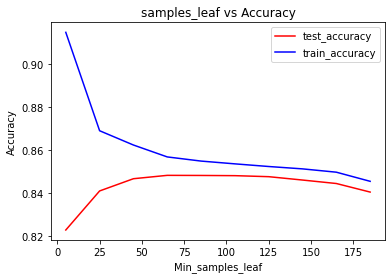

In [152]:
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],'red',label="test_accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],'blue',label="train_accuracy")
plt.xlabel("Min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("samples_leaf vs Accuracy")
plt.legend()
plt.show()


In [153]:
#tuning the model with min_samples_split
n_folds=5
parameters={'min_samples_split':range(5,200,20)}
dtree=DecisionTreeClassifier(criterion="gini")
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)
scores=tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.066578      0.002891         0.001000        0.002000   
1       0.061333      0.001905         0.002995        0.001898   
2       0.061899      0.003292         0.001400        0.001199   
3       0.086552      0.021361         0.002866        0.001776   
4       0.058624      0.004187         0.003209        0.001466   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.812219   
1                      25  {'min_samples_split': 25}           0.829505   
2                      45  {'min_samples_split': 45}           0.833294   
3                      65  {'min_samples_split': 65}           0.838267   
4                      85  {'min_samples_split': 85}           0.839451   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.802984           0.802036           0.804121  ...   
1           0.824769           0.831399           0.829465  ...   
2           0.832820           0.830926           0.840360  ...   
3           0.834004           0.833767           0.841071  ...   
4           0.837793           0.836372           0.841071  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.805807        0.003732               10            0.969449   
1         0.828779        0.002188                9            0.906454   
2         0.833468        0.003657                8            0.889284   
3         0.837115        0.002817                7            0.879692   
4         0.839720        0.002623                6            0.876199   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.970930            0.968798            0.970694   
1            0.907697            0.907756            0.905985   
2            0.890764            0.889816            0.889527   
3            0.882889            0.882830            0.881416   
4            0.879870            0.878271            0.878219   

   split4_train_score  mean_train_score  std_train_score  
0            0.970576          0.970090         0.000823  
1            0.906933          0.906965         0.000690  
2            0.890001          0.889878         0.000506  
3            0.883429          0.882051         0.001355  
4            0.879818          0.878475         0.001344  

[5 rows x 21 columns]

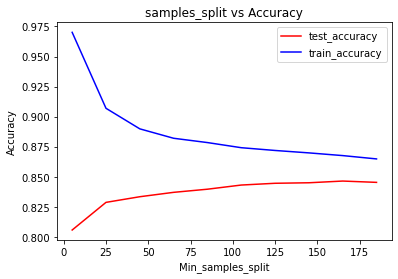

In [154]:
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],'red',label="test_accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],'blue',label="train_accuracy")
plt.xlabel("Min_samples_split")
plt.ylabel("Accuracy")
plt.title("samples_split vs Accuracy")
plt.legend()
plt.show()


In [157]:
#param_grids
parameters={"min_samples_leaf":range(5,150,50),"min_samples_split":range(5,150,50),"max_depth":range(5,150,5),
            "criterion":['gini','entropy']}
n_folds=5
dtree=DecisionTreeClassifier()
tree=GridSearchCV(dtree,parameters,cv=n_folds,return_train_score=True,verbose=1)
tree.fit(x_train,y_train)

Fitting 5 folds for each of 522 candidates, totalling 2610 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 150, 5),
                         'min_samples_leaf': range(5, 150, 50),
                         'min_samples_split': range(5, 150, 50)},
             return_train_score=True, verbose=1)

In [158]:
cv_results=tree.cv_results_
pd.DataFrame(cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.022857      0.008934         0.009067        0.006744   
1         0.027344      0.008324         0.003918        0.005903   
2         0.028798      0.003546         0.000684        0.000862   
3         0.029642      0.003471         0.000000        0.000000   
4         0.021602      0.006057         0.005766        0.006396   
..             ...           ...              ...             ...   
517       0.051093      0.001955         0.001008        0.002016   
518       0.050079      0.000065         0.002016        0.002470   
519       0.047059      0.002457         0.001000        0.002000   
520       0.046805      0.003068         0.002009        0.002461   
521       0.045480      0.000799         0.002000        0.002450   

    param_criterion param_max_depth param_min_samples_leaf  \
0              gini               5                      5   
1              gini               5                      5   
2              gini               5                      5   
3              gini               5                     55   
4              gini               5                     55   
..              ...             ...                    ...   
517         entropy             145                     55   
518         entropy             145                     55   
519         entropy             145                    105   
520         entropy             145                    105   
521         entropy             145                    105   

    param_min_samples_split  \
0                         5   
1                        55   
2                       105   
3                         5   
4                        55   
..                      ...   
517                      55   
518                     105   
519                       5   
520                      55   
521                     105   

                                                params  split0_test_score  \
0    {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.853422   
1    {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.853422   
2    {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.853422   
3    {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.853895   
4    {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.853895   
..                                                 ...                ...   
517  {'criterion': 'entropy', 'max_depth': 145, 'mi...           0.851054   
518  {'criterion': 'entropy', 'max_depth': 145, 'mi...           0.851054   
519  {'criterion': 'entropy', 'max_depth': 145, 'mi...           0.852948   
520  {'criterion': 'entropy', 'max_depth': 145, 'mi...           0.852948   
521  {'criterion': 'entropy', 'max_depth': 145, 'mi...           0.852948   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...         0.845782        0.005940              386   
1    ...         0.845829        0.005859              383   
2    ...         0.845829        0.005859              383   
3    ...         0.846161        0.005877              374   
4    ...         0.846161        0.005877              374   
..   ...              ...             ...              ...   
517  ...         0.847724        0.004734              238   
518  ...         0.847866        0.004869              199   
519  ...         0.847866        0.004195               94   
520  ...         0.847866        0.004195               94   
521  ...         0.847866        0.004195               94   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.848609            0.850799            0.843872   
1              0.848609            0.850799            0.843813   
2              0.848609            0.850799            0.843813   
3              0.848253            0.850799            0.843280   
4              0.848253            0.850799          

In [159]:
print("best score", tree.best_score_)
print("best Estimator", tree.best_estimator_)

best score 0.8514184633045918
best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=105)


In [160]:
check=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=105)
check.fit(x_train,y_train)
y_pred=check.predict(x_test)
score=accuracy_score(y_pred,y_test)
print("score: ",score)

score:  0.8550116034920986


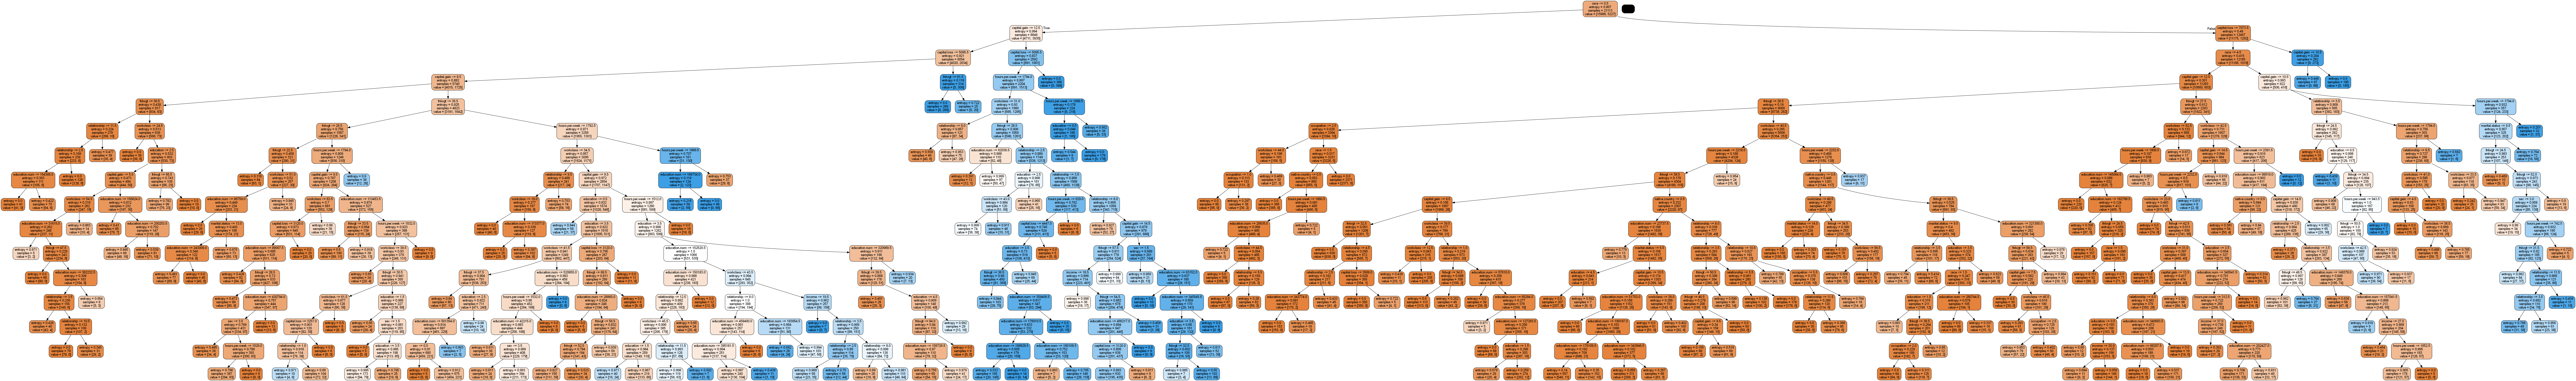

In [161]:
dot_data=StringIO()
export_graphviz(decision_tree=check,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [167]:
#reducing the max-depth
RD=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, min_samples_split=105)
RD.fit(x_train,y_train)
y_pred=RD.predict(x_test)
score=accuracy_score(y_pred,y_test)
print("score: ",score)

score:  0.8341253177146646


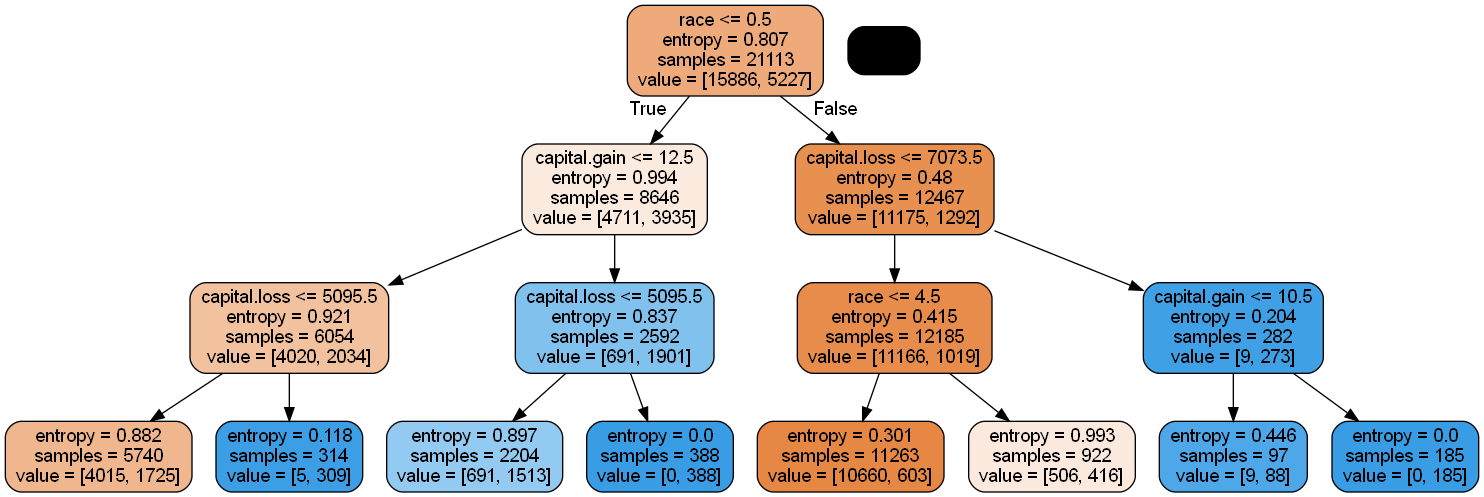

In [168]:
dot_data=StringIO()
export_graphviz(decision_tree=RD,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())